In [1]:
import pandas as pd 
import numpy as np


# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import classifiers
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# metrics contain our plot_confustion_matrix and classification_report
from sklearn import metrics

# Helper fuction to splitting data
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')


import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-1-ca1477078856>:51: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-1-ca1477078856>:52: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
df = pd.read_csv('DATA\music_data.csv')
df.head(100)

Unnamed: 0           artist_name                        track_name  \
0            0                mukesh              mohabbat bhi jhoothi   
1            4         frankie laine                         i believe   
2            6           johnnie ray                               cry   
3           10           pérez prado                          patricia   
4           12  giorgos papadopoulos                apopse eida oneiro   
..         ...                   ...                               ...   
95         274          the platters                i give you my word   
96         275            jerry vale                              more   
97         276            jerry vale              summertime in venice   
98         283           the clovers                  here goes a fool   
99         284   t. m. soundararajan  chinna kelbyaadve nanna ppuraana   

    release_date genre                                             lyrics  \
0           1950   pop  hold time feel break feel untrue convince spea...   
1           1950   pop  believe drop rain fall grow believe darkest ni...   
2           1950   pop  sweetheart send letter goodbye secret feel bet...   
3           1950   pop  kiss lips want stroll charm mambo chacha merin...   
4           1950   pop  till darling till matter know till dream live ...   
..           ...   ...                                                ...   
95          1956   pop  word word romance give lips heart soul heart b...   
96          1956   pop  innamorata innamorata lips meet innamorata kis...   
97          1956   pop  dream summertime venice summertime cafes sunli...   
98          1956   pop  world cold blood trap niggas show hoe backpack...   
99          1956   pop  lullaby birdland hear sigh wordland word revea...   

    len    dating  violence  world/life  ...   sadness  feelings  \
0    95  0.000598  0.063746    0.000598  ...  0.380299  0.117175   
1    51  0.035537  0.096777    0.443435  ...  0.001284  0.001284   
2    24  0.002770  0.002770    0.002770  ...  0.002770  0.225422   
3    54  0.048249  0.001548    0.001548  ...  0.225889  0.001548   
4    48  0.001350  0.001350    0.417772  ...  0.068800  0.001350   
..  ...       ...       ...         ...  ...       ...       ...   
95   28  0.001815  0.001815    0.221133  ...  0.092562  0.070837   
96   46  0.001949  0.001949    0.001949  ...  0.001949  0.001949   
97   31  0.002632  0.002632    0.002632  ...  0.151890  0.101069   
98  156  0.000560  0.125690    0.000560  ...  0.000560  0.072301   
99   57  0.001504  0.001504    0.001504  ...  0.001504  0.001504   

    danceability  loudness  acousticness  instrumentalness   valence  \
0       0.357739  0.454119      0.997992          0.901822  0.339448   
1       0.331745  0.647540      0.954819          0.000002  0.325021   
2       0.456298  0.585288      0.840361          0.000000  0.351814   
3       0.686992  0.744404      0.083935          0.199393  0.775350   
4       0.291671  0.646489      0.975904          0.000246  0.597073   
..           ...       ...           ...               ...       ...   
95      0.498538  0.664334      0.859438          0.000004  0.632110   
96      0.155204  0.600646      0.938755          0.004109  0.051834   
97      0.177949  0.508294      0.789156          0.000016  0.196208   
98      0.378317  0.495347      0.886546          0.000000  0.457955   
99      0.442218  0.616876      0.975904          0.000029  0.684666   

      energy       topic       age  
0   0.137110     sadness  1.000000  
1   0.263240  world/life  1.000000  
2   0.139112       music  1.000000  
3   0.743736    romantic  1.000000  
4   0.394375    romantic  1.000000  
..       ...         ...       ...  
95  0.363343       music  0.914286  
96  0.253230    romantic  0.914286  
97  0.214190       music  0.914286  
98  0.122095     obscene  0.914286  
99  0.318297    romantic  0.914286  

[100 rows x 31 columns]

In [3]:
df.isnull().sum()
df.describe()

Unnamed: 0  release_date           len        dating      violence  \
count  28372.000000  28372.000000  28372.000000  28372.000000  28372.000000   
mean   42946.323558   1990.236888     73.028444      0.021112      0.118396   
std    24749.325492     18.487463     41.829831      0.052370      0.178684   
min        0.000000   1950.000000      1.000000      0.000291      0.000284   
25%    20391.250000   1975.000000     42.000000      0.000923      0.001120   
50%    45405.500000   1991.000000     63.000000      0.001462      0.002506   
75%    64090.500000   2007.000000     93.000000      0.004049      0.192608   
max    82451.000000   2019.000000    199.000000      0.647706      0.981781   

         world/life    night/time  shake the audience  family/gospel  \
count  28372.000000  28372.000000        28372.000000   28372.000000   
mean       0.120973      0.057387            0.017422       0.017045   
std        0.172200      0.111923            0.040670       0.041966   
min        0.000291      0.000289            0.000284       0.000289   
25%        0.001170      0.001032            0.000993       0.000923   
50%        0.006579      0.001949            0.001595       0.001504   
75%        0.197793      0.065842            0.010002       0.004785   
max        0.962105      0.973684            0.497463       0.545303   

           romantic  ...    like/girls       sadness      feelings  \
count  28372.000000  ...  28372.000000  28372.000000  28372.000000   
mean       0.048681  ...      0.028057      0.129389      0.030996   
std        0.106095  ...      0.058473      0.181143      0.071652   
min        0.000284  ...      0.000284      0.000284      0.000289   
25%        0.000975  ...      0.000975      0.001144      0.000993   
50%        0.001754  ...      0.001595      0.005263      0.001754   
75%        0.042301  ...      0.026622      0.235113      0.032622   
max        0.940789  ...      0.594459      0.981424      0.958810   

       danceability      loudness  acousticness  instrumentalness  \
count  28372.000000  28372.000000  2.837200e+04      28372.000000   
mean       0.533348      0.665249  3.392347e-01          0.080049   
std        0.173218      0.108434  3.267143e-01          0.211245   
min        0.005415      0.000000  2.811248e-07          0.000000   
25%        0.412975      0.595364  3.423598e-02          0.000000   
50%        0.538612      0.679050  2.259028e-01          0.000085   
75%        0.656666      0.749026  6.325298e-01          0.009335   
max        0.993502      1.000000  1.000000e+00          0.996964   

            valence        energy           age  
count  28372.000000  28372.000000  28372.000000  
mean       0.532864      0.569875      0.425187  
std        0.250972      0.244385      0.264107  
min        0.000000      0.000000      0.014286  
25%        0.329143      0.380361      0.185714  
50%        0.539365      0.580567      0.414286  
75%        0.738252      0.772766      0.642857  
max        1.000000      1.000000      1.000000  

[8 rows x 26 columns]

C:\Users\samue\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


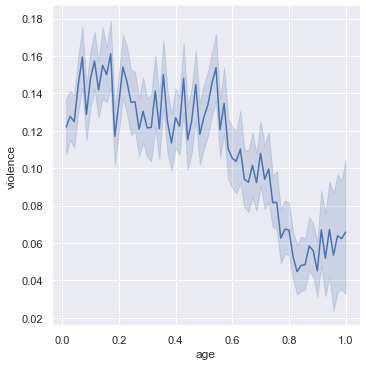

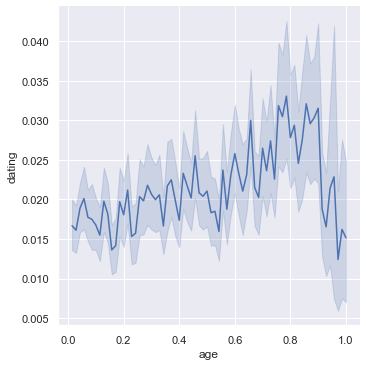

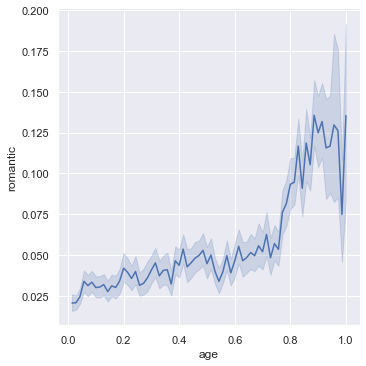

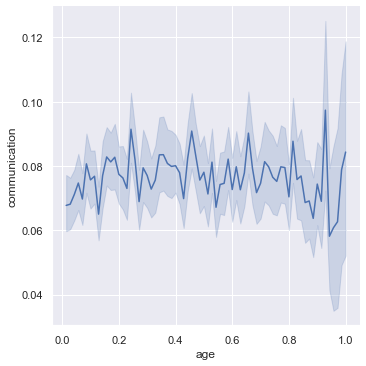

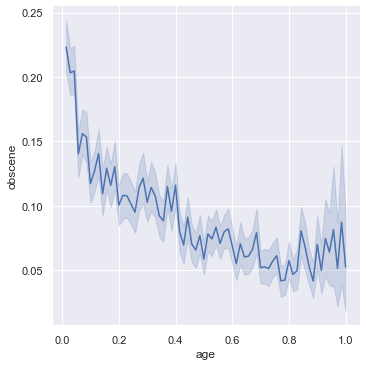

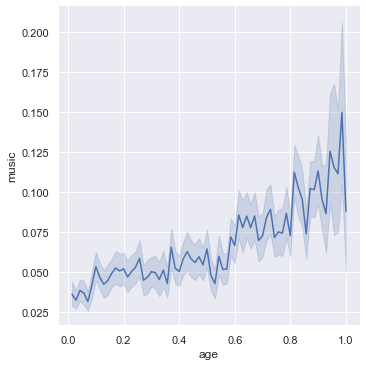

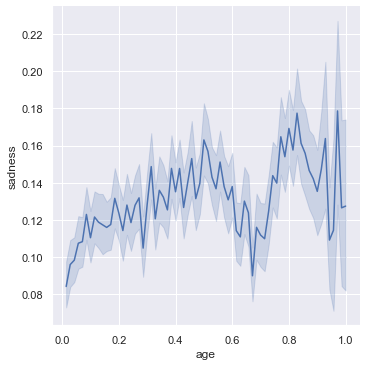

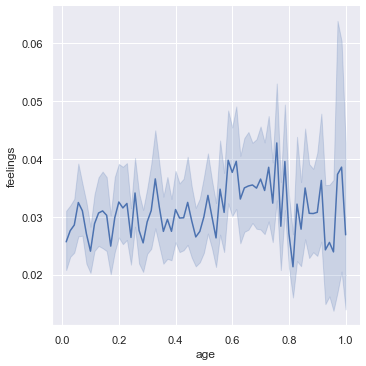

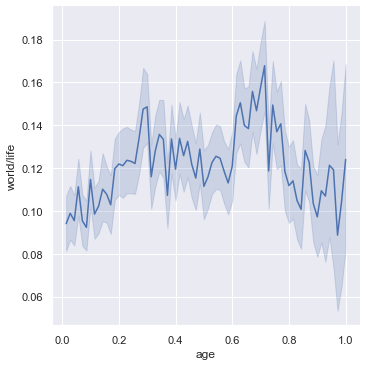

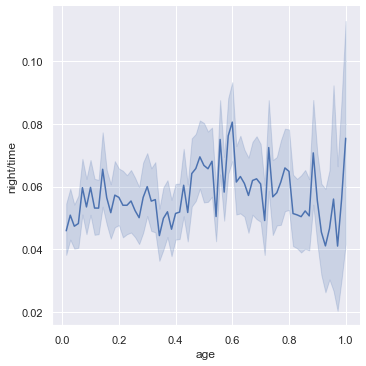

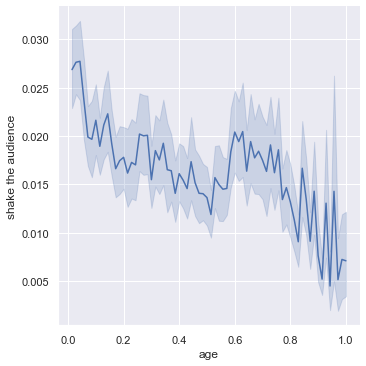

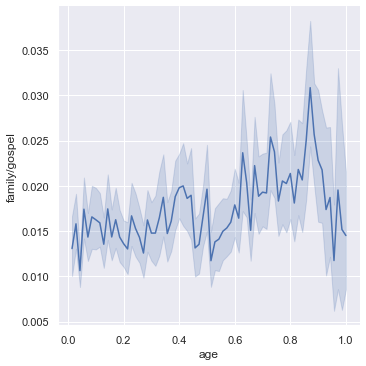

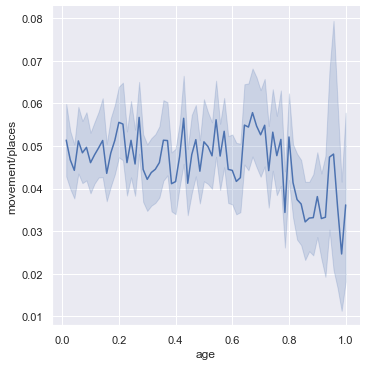

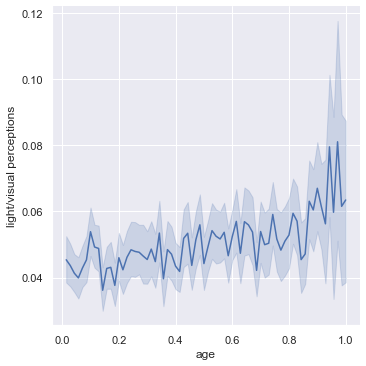

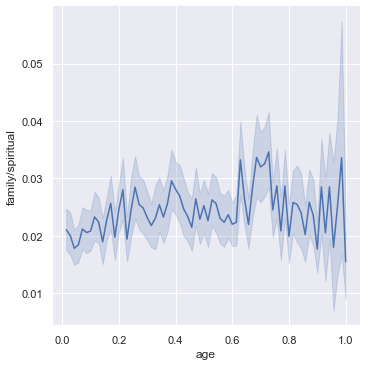

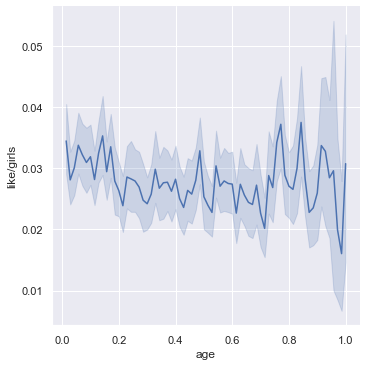

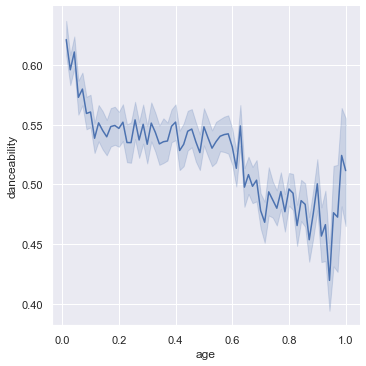

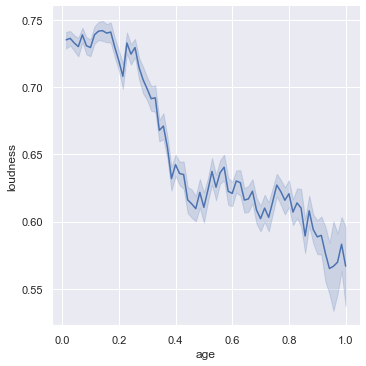

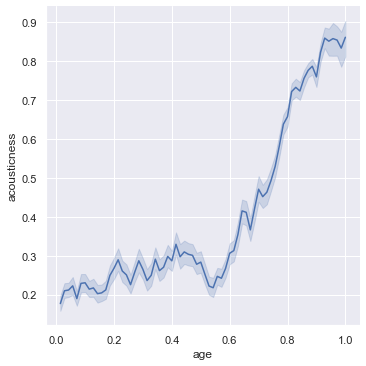

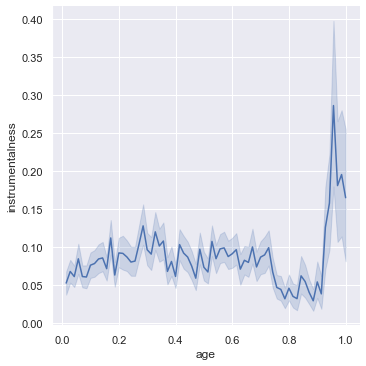

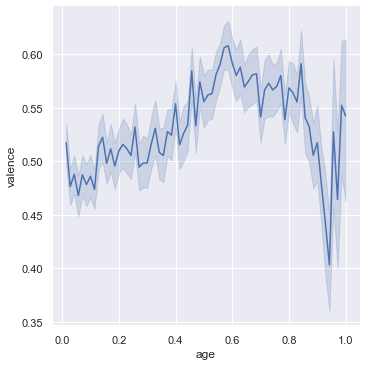

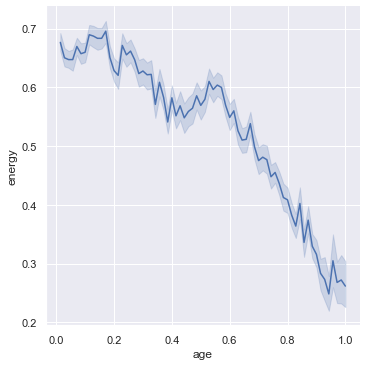

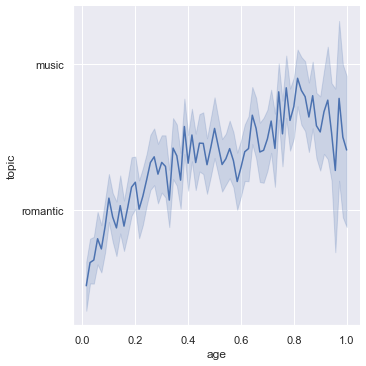

In [4]:
all_features = ['violence', 'dating', 'romantic', 'communication', 'obscene', 'music', 'sadness', 'feelings',
               'world/life', 'night/time', 'shake the audience', 'family/gospel', 'movement/places', 'light/visual perceptions',
               'family/spiritual', 'like/girls', 'danceability', 'loudness', 'acousticness', 'instrumentalness',
               'valence', 'energy', 'topic']
for feature in all_features:
    sns.relplot(data = df, y = feature, x = 'age', kind = 'line', height = 5, aspect = 1)

In [5]:
def make_lower(a_string):
    return a_string.lower()

def remove_punctuation(a_string):    
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string

def stem_words(a_string):
    # Initalize our Stemmer
    porter = PorterStemmer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in words:
        # Stem the word
        stemmed_word = porter.stem(word)
        
        # Append stemmed word to our valid_words
        valid_words.append(stemmed_word)
        
    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string 

def text_pipeline(input_string):
    input_string = make_lower(input_string)
    input_string = remove_punctuation(input_string)    
    return input_string
df['message_clean'] = df['lyrics']
df['message_clean'] = df['lyrics'].apply(text_pipeline)

In [10]:
X = df['message_clean'].values
y = df['genre'].values

In [11]:
c1 = df['message_clean'].str.contains('hold')
c3 = df['message_clean'].str.contains('time')
c2 = df['artist_name']
df['Checker'] =  np.where( c1 & c3, 1, 0 )
select_statement = df['Checker'] == 1
df[ select_statement ]

Unnamed: 0             artist_name            track_name  release_date  \
0               0                  mukesh  mohabbat bhi jhoothi          1950   
4              12    giorgos papadopoulos    apopse eida oneiro          1950   
46            126  los hermanos arriagada                 poema          1954   
63            185               ted heath        to you my love          1955   
79            244         harry belafonte        i do adore her          1956   
...           ...                     ...                   ...           ...   
28294       82349         tyron blackshit             bunny hop          2019   
28299       82354          flipmode squad  this is what happens          2019   
28311       82369                   rakim            it's the r          2019   
28313       82371            denzel curry             equalizer          2019   
28339       82407                fabolous             bad bitch          2019   

         genre                                             lyrics  len  \
0          pop  hold time feel break feel untrue convince spea...   95   
4          pop  till darling till matter know till dream live ...   48   
46         pop  night mind deep dream till time look eye touch...   55   
63         pop  long finish patrol light burn distance dare so...  135   
79         pop  shadow fall star appear pain feel relive faith...   78   
...        ...                                                ...  ...   
28294  hip hop  time somebody life line start slip years go bi...   85   
28299  hip hop  nigga digga rampage word street flipmode arise...  110   
28311  hip hop  lowkey need host brand know flow cause swerve ...  176   
28313  hip hop  ultimate equalizer synthesizer ultimately brut...  149   
28339  hip hop  fabolous hahahaha yeah ghetto superstar nigga ...  162   

         dating  violence  world/life  ...  danceability  loudness  \
0      0.000598  0.063746    0.000598  ...      0.357739  0.454119   
4      0.001350  0.001350    0.417772  ...      0.291671  0.646489   
46     0.057994  0.000940    0.355957  ...      0.547276  0.508371   
63     0.000566  0.321891    0.000566  ...      0.579768  0.501449   
79     0.001224  0.001224    0.162519  ...      0.666414  0.560136   
...         ...       ...         ...  ...           ...       ...   
28294  0.000907  0.082185    0.099456  ...      0.855951  0.673564   
28299  0.000774  0.000774    0.000774  ...      0.727066  0.809810   
28311  0.033931  0.000543    0.000543  ...      0.811546  0.669051   
28313  0.000658  0.145060    0.000658  ...      0.757392  0.771325   
28339  0.000548  0.076798    0.000548  ...      0.847287  0.716201   

       acousticness  instrumentalness   valence    energy     topic       age  \
0          0.997992          0.901822  0.339448  0.137110   sadness  1.000000   
4          0.975904          0.000246  0.597073  0.394375  romantic  1.000000   
46         0.738956          0.000000  0.749588  0.314293   sadness  0.942857   
63         0.939759          0.000001  0.668178  0.295273  violence  0.928571   
79         0.973896          0.000000  0.861913  0.289267   sadness  0.914286   
...             ...               ...       ...       ...       ...       ...   
28294      0.050702          0.000000  0.510511  0.492477   obscene  0.014286   
28299      0.082730          0.000129  0.672300  0.827822   obscene  0.014286   
28311      0.150602          0.000000  0.845425  0.582570   obscene  0.014286   
28313      0.003523          0.002176  0.350783  0.537523   obscene  0.014286   
28339      0.038955          0.000000  0.947444  0.476460   obscene  0.014286   

                                           message_clean  Checker  
0      hold time feel break feel untrue convince spea...        1  
4      till darling till matter know till dream live ...        1  
46     night mind deep dream till time look eye touch...        1  
63     long finish patrol light burn distance dare so...   

In [12]:
df1 = df[['artist_name','track_name','genre','message_clean']]

df1.head()

artist_name            track_name genre  \
0                mukesh  mohabbat bhi jhoothi   pop   
1         frankie laine             i believe   pop   
2           johnnie ray                   cry   pop   
3           pérez prado              patricia   pop   
4  giorgos papadopoulos    apopse eida oneiro   pop   

                                       message_clean  
0  hold time feel break feel untrue convince spea...  
1  believe drop rain fall grow believe darkest ni...  
2  sweetheart send letter goodbye secret feel bet...  
3  kiss lips want stroll charm mambo chacha merin...  
4  till darling till matter know till dream live ...

In [13]:
def filterFunction(df,word1,word2):
    w1 = df['message_clean'].str.contains(word1)
    w2 = df['message_clean'].str.contains(word2)
    df['checker'] = np.where(w1&w2, 1,0)
    select_statement = df['checker']==1
    print(df[select_statement])

    
filterFunction(df1,'rap','tonight')

          artist_name                                track_name    genre  \
43        asha bhosle            mere hamsafar tujhe kya khabar      pop   
895    wilson pickett                       teardrops will fall      pop   
1374      classics iv                                    traces      pop   
1783     procol harum                               grand hotel      pop   
1967        joan baez                        fountain of sorrow      pop   
...               ...                                       ...      ...   
27899        styles p  rude boy hip hop (feat. raheem devaughn)  hip hop   
27973         mack 10                                  so sharp  hip hop   
28018           ice-t           new jack hustler (nino's theme)  hip hop   
28201     lloyd banks                                i get high  hip hop   
28234        ms. jade                               ching ching  hip hop   

                                           message_clean  checker  
43     hold close t

<ipython-input-13-8e160bd4ba20>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['checker'] = np.where(w1&w2, 1,0)


In [14]:
NewOutcome = df1[df1['checker']==1]
NewOutcome.head(100)

artist_name                                track_name    genre  \
43        asha bhosle            mere hamsafar tujhe kya khabar      pop   
895    wilson pickett                       teardrops will fall      pop   
1374      classics iv                                    traces      pop   
1783     procol harum                               grand hotel      pop   
1967        joan baez                        fountain of sorrow      pop   
...               ...                                       ...      ...   
27899        styles p  rude boy hip hop (feat. raheem devaughn)  hip hop   
27973         mack 10                                  so sharp  hip hop   
28018           ice-t           new jack hustler (nino's theme)  hip hop   
28201     lloyd banks                                i get high  hip hop   
28234        ms. jade                               ching ching  hip hop   

                                           message_clean  checker  
43     hold close tonight hear doubt alright felt spe...        1  
895    teardrops fall tonight teardrops fall read let...        1  
1374   fade photograph cover line crease ticket tear ...        1  
1783   tonight sleep silken sheet drink fine wine rar...        1  
1967   look photograph inside drawer take photograph ...        1  
...                                                  ...      ...  
27899  ghost spree like rappers cover tonight light s...        1  
27973  stay sharp yeah sharp mean know money grow sta...        1  
28018  hustler word pull trigger long grit teeth spra...        1  
28201  know suppose smoke bouncer motherfuckin hand h...        1  
28234  ching ching ching ching ching money spend toda...        1  

[91 rows x 5 columns]

In [ ]:
NewOutcome.isnull().sum()

In [ ]:
NewOutcome = pd.get_dummies(NewOutcome,columns=['checker'],drop_first=False)
NewOutcome.head()

In [15]:
import plotly.graph_objects as go

labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
values = [4500, 2500, 1053, 500]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.2, 0])])
fig.show()

In [16]:
pd.set_option('display.max_columns', None)
df.head(50)

Unnamed: 0             artist_name  \
0            0                  mukesh   
1            4           frankie laine   
2            6             johnnie ray   
3           10             pérez prado   
4           12    giorgos papadopoulos   
5           14              perry como   
6           15               freestyle   
7           17           johnny mathis   
8           20     stélios kazantzídis   
9           23     stélios kazantzídis   
10          28               liva weel   
11          32          the chordettes   
12          33           frankie laine   
13          34              ghantasala   
14          36                les paul   
15          37                les paul   
16          40                les paul   
17          44                les paul   
18          53             asha bhosle   
19          54             asha bhosle   
20          56           mohammed rafi   
21          57              ghantasala   
22          58              ghantasala   
23          62                les paul   
24          64                  mukesh   
25          65         lata mangeshkar   
26          66         lata mangeshkar   
27          68             asha bhosle   
28          70         lata mangeshkar   
29          73         lata mangeshkar   
30          74         lata mangeshkar   
31          75             asha bhosle   
32          77             asha bhosle   
33          80                  mukesh   
34          84              ghantasala   
35          86                les paul   
36          90                les paul   
37          99     t. m. soundararajan   
38         100           talat mahmood   
39         101           andy williams   
40         102         lata mangeshkar   
41         106         lata mangeshkar   
42         110           frankie laine   
43         115             asha bhosle   
44         118       sven-bertil taube   
45         125            bobby vinton   
46         126  los hermanos arriagada   
47         127            the drifters   
48         128          the chordettes   
49         130         harry belafonte   

                                           track_name  release_date genre  \
0                                mohabbat bhi jhoothi          1950   pop   
1                                           i believe          1950   pop   
2                                                 cry          1950   pop   
3                                            patricia          1950   pop   
4                                  apopse eida oneiro          1950   pop   
5   round and round (with mitchell ayres and his o...          1950   pop   
6                          opm medley: when i met you          1950   pop   
7                              it's not for me to say          1950   pop   
8                            klapse me mana klapse me          1950   pop   
9                                   finito la mouzika          1950   pop   
10                       drømmer man om den, vågner..          1951   pop   
11                                      carolina moon          1951   pop   
12                                     necessary evil          1951   pop   
13                                    kanugona galano          1951   pop   
14                                        the carioca          1951   pop   
15                                       chicken reel          1951   pop   
16                                         blue skies          1951   pop   
17                                          dark eyes          1951   pop   
18                                      kotha mukunda          1952   pop   
19                          awaz deta hai sola ka din          1952   pop   
20                    jahan men log sachhe ashikon ko          1952   pop   
21                                   avanee nee pathi          1952   pop   
22                               ee jagamantha natika          1952   pop   
23           

In [17]:
df.shape

(28372, 33)

In [18]:
df.iloc[0:28372,7:29]

dating  violence  world/life  night/time  shake the audience  \
0      0.000598  0.063746    0.000598    0.000598            0.000598   
1      0.035537  0.096777    0.443435    0.001284            0.001284   
2      0.002770  0.002770    0.002770    0.002770            0.002770   
3      0.048249  0.001548    0.001548    0.001548            0.021500   
4      0.001350  0.001350    0.417772    0.001350            0.001350   
...         ...       ...         ...         ...                 ...   
28367  0.001350  0.001350    0.001350    0.001350            0.001350   
28368  0.001284  0.001284    0.035338    0.001284            0.001284   
28369  0.001504  0.154302    0.168988    0.001504            0.039755   
28370  0.001196  0.001196    0.001196    0.001196            0.048359   
28371  0.001012  0.075202    0.001012    0.001012            0.001012   

       family/gospel  romantic  communication   obscene     music  \
0           0.048857  0.017104       0.263751  0.000598  0.039288   
1           0.027007  0.001284       0.001284  0.001284  0.118034   
2           0.002770  0.158564       0.250668  0.002770  0.323794   
3           0.001548  0.411536       0.001548  0.001548  0.001548   
4           0.001350  0.463430       0.001350  0.001350  0.001350   
...              ...       ...            ...       ...       ...   
28367       0.001350  0.001350       0.001350  0.391651  0.001350   
28368       0.001284  0.066324       0.203889  0.318910  0.058152   
28369       0.001504  0.035401       0.001504  0.356685  0.001504   
28370       0.001196  0.001196       0.001196  0.492434  0.103614   
28371       0.001012  0.001012       0.001012  0.754444  0.046284   

       movement/places  light/visual perceptions  family/spiritual  \
0             0.000598                  0.000598          0.000598   
1             0.001284                  0.212681          0.051124   
2             0.002770                  0.002770          0.002770   
3             0.129250                  0.001548          0.001548   
4             0.001350                  0.001350          0.029755   
...                ...                       ...               ...   
28367         0.435089                  0.001350          0.001350   
28368         0.134955                  0.001284          0.001284   
28369         0.068684                  0.001504          0.001504   
28370         0.001196                  0.202659          0.001196   
28371         0.001012                  0.001012          0.001012   

       like/girls   sadness  feelings  danceability  loudness  acousticness  \
0        0.000598  0.380299  0.117175      0.357739  0.454119      0.997992   
1        0.001284  0.001284  0.001284      0.331745  0.647540      0.954819   
2        0.002770  0.002770  0.225422      0.456298  0.585288      0.840361   
3        0.081132  0.225889  0.001548      0.686992  0.744404      0.083935   
4        0.001350  0.068800  0.001350      0.291671  0.646489      0.975904   
...           ...       ...       ...           ...       ...           ...   
28367    0.001350  0.065664  0.001350      0.889527  0.759711      0.062549   
28368    0.040811  0.001284  0.001284      0.662082  0.789580      0.004607   
28369    0.001504  0.001504  0.001504      0.663165  0.726970      0.104417   
28370    0.070867  0.001196  0.001196      0.883028  0.786888      0.007027   
28371    0.001012  0.001012  0.033995      0.828875  0.674794      0.015862   

       instrumentalness   valence    energy  
0              0.901822  0.339448  0.137110  
1              0.000002  0.325021  0.263240  
2              0.000000  0.351814  0.139112  
3              0.199393  0.775350  0.743736  
4              0.000246  0.597073  0.394375  
...                 ...       ...       ...  
28367          0.000000  0.751649  0.695686  
28368          0.000002  0.922712  0.797791  
28369          0.000001  0.838211  0.767761  
28370          0.000503  0.508450  0.885882  
28371  

In [19]:
df['mood_feeling']=df.iloc[0:28372,7:29].idxmax(axis=1)
df['mood_feeling']

0        acousticness
1        acousticness
2        acousticness
3             valence
4        acousticness
             ...     
28367    danceability
28368         valence
28369         valence
28370          energy
28371    danceability
Name: mood_feeling, Length: 28372, dtype: object

In [20]:
df['max value'] = df.iloc[0:28372,7:29].max(axis=1)

In [21]:
df.head(100)

Unnamed: 0           artist_name                        track_name  \
0            0                mukesh              mohabbat bhi jhoothi   
1            4         frankie laine                         i believe   
2            6           johnnie ray                               cry   
3           10           pérez prado                          patricia   
4           12  giorgos papadopoulos                apopse eida oneiro   
..         ...                   ...                               ...   
95         274          the platters                i give you my word   
96         275            jerry vale                              more   
97         276            jerry vale              summertime in venice   
98         283           the clovers                  here goes a fool   
99         284   t. m. soundararajan  chinna kelbyaadve nanna ppuraana   

    release_date genre                                             lyrics  \
0           1950   pop  hold time feel break feel untrue convince spea...   
1           1950   pop  believe drop rain fall grow believe darkest ni...   
2           1950   pop  sweetheart send letter goodbye secret feel bet...   
3           1950   pop  kiss lips want stroll charm mambo chacha merin...   
4           1950   pop  till darling till matter know till dream live ...   
..           ...   ...                                                ...   
95          1956   pop  word word romance give lips heart soul heart b...   
96          1956   pop  innamorata innamorata lips meet innamorata kis...   
97          1956   pop  dream summertime venice summertime cafes sunli...   
98          1956   pop  world cold blood trap niggas show hoe backpack...   
99          1956   pop  lullaby birdland hear sigh wordland word revea...   

    len    dating  violence  world/life  night/time  shake the audience  \
0    95  0.000598  0.063746    0.000598    0.000598            0.000598   
1    51  0.035537  0.096777    0.443435    0.001284            0.001284   
2    24  0.002770  0.002770    0.002770    0.002770            0.002770   
3    54  0.048249  0.001548    0.001548    0.001548            0.021500   
4    48  0.001350  0.001350    0.417772    0.001350            0.001350   
..  ...       ...       ...         ...         ...                 ...   
95   28  0.001815  0.001815    0.221133    0.001815            0.001815   
96   46  0.001949  0.001949    0.001949    0.001949            0.001949   
97   31  0.002632  0.002632    0.002632    0.002632            0.002632   
98  156  0.000560  0.125690    0.000560    0.000560            0.014483   
99   57  0.001504  0.001504    0.001504    0.001504            0.001504   

    family/gospel  romantic  communication   obscene     music  \
0        0.048857  0.017104       0.263751  0.000598  0.039288   
1        0.027007  0.001284       0.001284  0.001284  0.118034   
2        0.002770  0.158564       0.250668  0.002770  0.323794   
3        0.001548  0.411536       0.001548  0.001548  0.001548   
4        0.001350  0.463430       0.001350  0.001350  0.001350   
..            ...       ...            ...       ...       ...   
95       0.001815  0.276172       0.001815  0.001815  0.313888   
96       0.001949  0.706537       0.001949  0.001949  0.001949   
97       0.002632  0.076805       0.002632  0.002632  0.312162   
98       0.012764  0.000560       0.062190  0.558939  0.000560   
99       0.001504  0.423573       0.111730  0.001504  0.170083   

    movement/places  light/visual perceptions  family/spiritual  like/girls  \
0          0.000598                  0.000598          0.000598    0.000598   
1          0.001284                  0.212681          0.051124    0.001284   
2          0.002770                  0.002770          0.002770    0.002770   
3          0.129250                  0.001548          0.001548    0.081132   
4          0.001350                  0.001350          0.029755    0.001350   
..              ...   